In [1]:
## Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from collections import Counter
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Reading in the CSV

df = pd.read_csv('df.csv', index_col = 0)


Bad key "text.kerning_factor" on line 4 in
/Users/joseramirez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
X = df.drop(['LA1and10', 'CensusTract', 'State', 'County'], axis = 1)
y = df.LA1and10

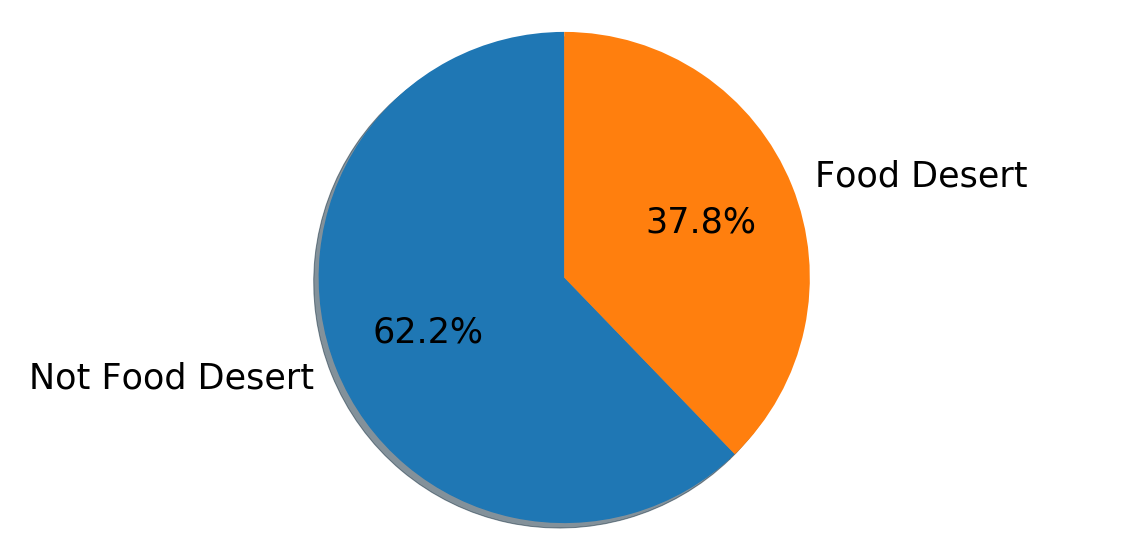

In [3]:
##Showing my class imbalance

labels = 'Not Food Desert', 'Food Desert'
sizes = y.value_counts()

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 35})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

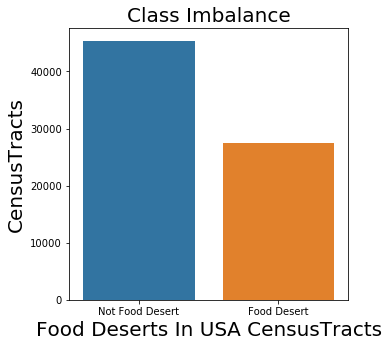

In [5]:
##Showing class imbalance

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.barplot(x=['Not Food Desert', 'Food Desert'], y=y.value_counts())
ax.set_xlabel("Food Deserts In USA CensusTracts", fontsize=20)
ax.set_ylabel("CensusTracts", fontsize=20)
ax.set_title('Class Imbalance', fontsize=20)
fig.savefig("Food Deserts in USA CensusTracts.png")

# I want to test to see if whether a Census Tract belonging to an urban vs rural environment has an effect on if that Census Tract is a food desert or not

## Ho: P₁ = P₂
## Ha: P₁ ≠ P₂

In [6]:
df[df['Urban'] == 1]['LA1and10'].sum()

24322

In [7]:
df[df['Urban'] == 1]['LA1and10'].count()

55172

In [8]:
df[df['Urban'] == 0]['LA1and10'].sum()

3204

In [9]:
df[df['Urban'] == 0]['LA1and10'].count()

17690

In [10]:
count = np.array([24322, 3205])
nobs =np.array([55172,17692])

In [11]:
## Two proportion z test

stat, pval = proportions_ztest(count, nobs)

In [12]:
stat

61.993203988720786

In [13]:
pval

0.0

## With a test statistic of 61.99 and a p-value of 0, I can reject the null hypothesis that the proportions are equal for people who live in a urban environment and people who live in a rural environment. As a result, I will keep this feature.

In [14]:
## Graphing the difference

urban = df[df['Urban'] == 1]['LA1and10']
rural = df[df['Urban'] == 0]['LA1and10']

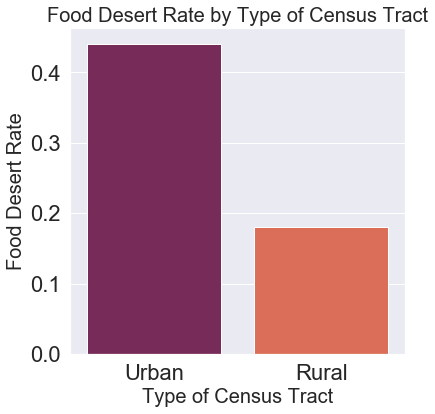

In [18]:
## Bar Graph 

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale = 2)
fd = sns.barplot(x = ['Urban', 'Rural'],y = [urban.mean(), rural.mean()], order = ['Urban', 'Rural'], palette = 'rocket',  ax=ax)
ax.set_xlabel("Type of Census Tract", fontsize=20)
ax.set_ylabel("Food Desert Rate", fontsize=20)
ax.set_title('Food Desert Rate by Type of Census Tract', fontsize=20)
fig.savefig("Food Desert Rate by Type of Census Tract.png")

## Next I want to test to see if having low vehicle access in an urban environment has more of an effect on if that Census Tract is a food desert than just living in an urban environment alone.

## Ho: P₁ = P₂¶
## Ha: P₁ ≠ P₂

In [19]:
##New column that is both low vehicle access and urban

df['LowVehicleAccessUrban'] = df['HUNVFlag'] * df['Urban']

In [20]:
df[df['LowVehicleAccessUrban'] == 1]['LA1and10'].sum()

7478

In [21]:
df[df['LowVehicleAccessUrban'] == 1]['LA1and10'].count()

13048

In [22]:
df[df['Urban'] == 1]['LA1and10'].sum()

24322

In [23]:
df[df['Urban'] == 1]['LA1and10'].count()

55172

In [24]:
count2 = np.array([7478, 24322])
nobs2 =np.array([13048,55172])

In [25]:
# Two proportion z test

stat2, pval2 = proportions_ztest(count2, nobs2)

In [26]:
stat2

27.238410095264022

In [27]:
pval2

2.2798624471162586e-163

## With a test statistic of 27.24 and a p-value of 2.28 x 10^-163, I can reject the null hypothesis that the proportions are equal for people who live in a urban environment with low vehicle access and people who live in an urban environment alone. As a result, I will keep this feature.

In [28]:
##Graphing the difference

lowvaurban = df[df['LowVehicleAccessUrban'] == 1]['LA1and10']
urbanalone = df[df['Urban'] == 1]['LA1and10']

In [29]:
lowvaurban.mean()

0.5731146535867566

In [30]:
urbanalone.mean()

0.4408395562966722

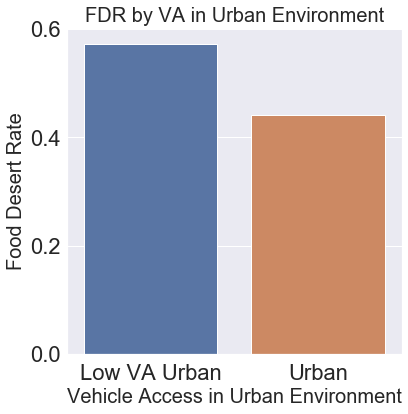

In [31]:
## Bar Graph

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale = 2)
lvaenv = sns.barplot(x = ['Low VA Urban', 'Urban'],y = [lowvaurban.mean(), urbanalone.mean()], order = ['Low VA Urban', 'Urban'], ax=ax)
ax.set_xlabel("Vehicle Access in Urban Environment", fontsize=20)
ax.set_ylabel("Food Desert Rate", fontsize=20)
ax.set_yticks([0,0.2,0.4,0.6])
ax.set_title('FDR by VA in Urban Environment', fontsize=20)
ax.tick_params(axis='y', pad=0)
fig.savefig("Vehicle Access in Urban Environment.png")

## Now we can try to engineer another feature
## I want to see if living in a Census Tract that has a population that is 50% or greater minority has an effect on whether that Census Tract is a food desert or not

In [32]:
df.iloc[:,20]

0          0
1         42
2         10
3         19
4        172
        ... 
72857     21
72858      0
72859     39
72860      0
72861     60
Name: Asian Population, Length: 72862, dtype: int64

In [33]:
df['Minority Population'] = df.iloc[:,20] + df.iloc[:,21] + df.iloc[:,22] + df.iloc[:,23] + df.iloc[:,24]

In [34]:
df['Minority > 50%'] = np.where(df['Minority Population'] > df['White Population'],1,0)

## Ho: P₁ = P₂
## Ha: P₁ ≠ P₂

In [35]:
df[df['Minority > 50%'] == 1]['LA1and10'].sum()

8779

In [36]:
df[df['Minority > 50%'] == 1]['LA1and10'].count()

30476

In [37]:
df[df['Minority > 50%'] == 0]['LA1and10'].sum()

18747

In [38]:
df[df['Minority > 50%'] == 0]['LA1and10'].count()

42386

In [39]:
count3 = np.array([4333, 23193])
nobs3 =np.array([16765,56097])

In [40]:
# Two proportion z test

stat3, pval3 = proportions_ztest(count3, nobs3)

In [41]:
stat3

-36.31877050420876

In [42]:
pval3

8.179766986559043e-289

## With a test statistic of -36.32 and a p-value of 8.20 x 10^-289, I can reject the null hypothesis that the proportions are equal for people who live in a Census Tract with a population of minorities greater than 50% and people who live in a Census Tract with a population of white people greater than or equal to 50%. As a result, I will keep this feature.

## However, I should add that it's surprising to see that there is a great proportion of food deserts in Census Tracts with populations of white people greater than or equal to 50%. This runs contrary to what I have previously read about food deserts.

In [43]:
df.drop(columns =['Minority Population'], axis = 1, inplace = True)

In [44]:
df.to_csv('df.csv')